Exercises

The end result of this exercise should be a Jupyter notebook named model.

Using saas.csv or log data from API usage or store_item_sales

Split data (train/test) and resample by any period, except daily, and aggregate using the sum.
Forecast, plot and evaluate using each of the 4 parametric based methods we discussed:
Simple Average
Moving Average
Holt's Linear Trend Model
Based on previous year/month/etc., this is up to you.
Optional: Using store item demand

# Revised in class exercise was to use a dataset of our choice to forecast, plot, and evalute. 

# I used the Fitbit dataset see the Fitbit.ipynb

# Creating and testing explore.py and model.py

In [1]:
import acquire
import prepare
import summarize
import explore
import model

import matplotlib.pyplot as plt
# set chart defaults
explore.set_plotting_defaults()

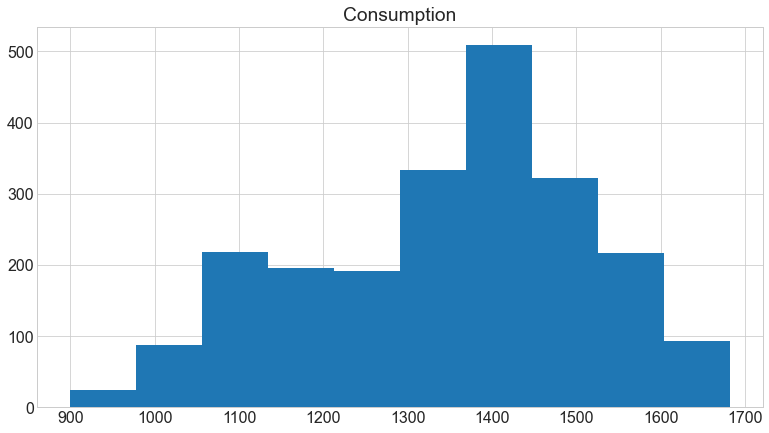

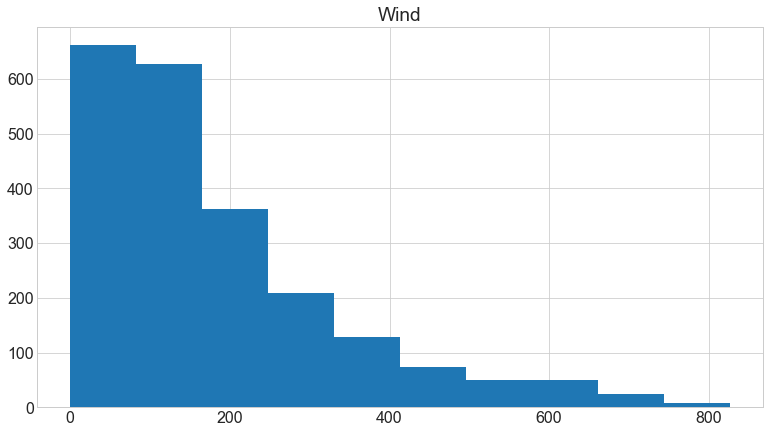

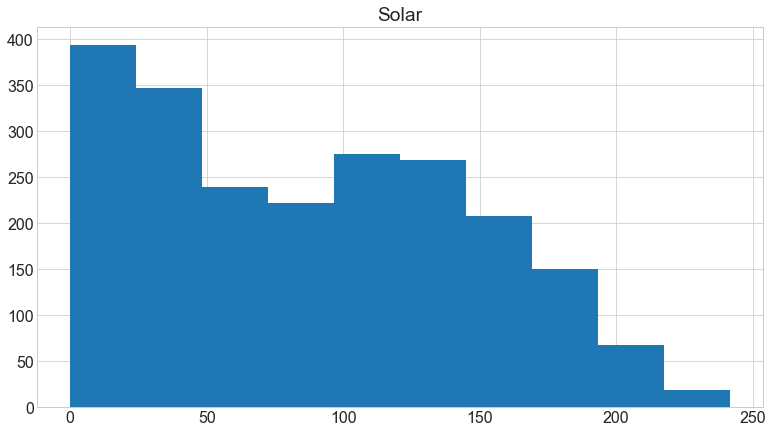

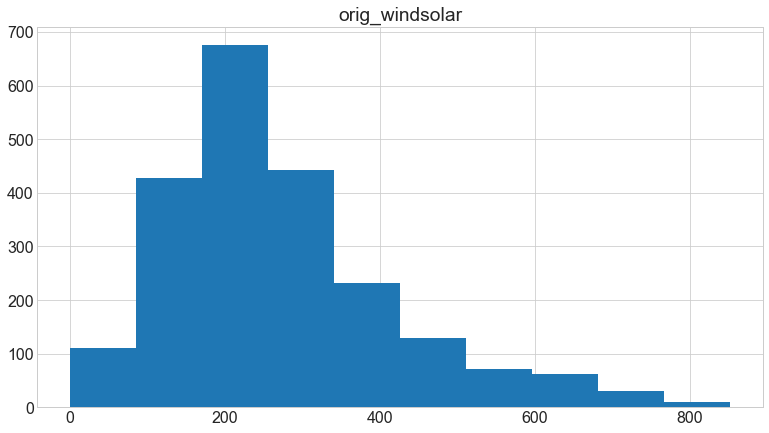

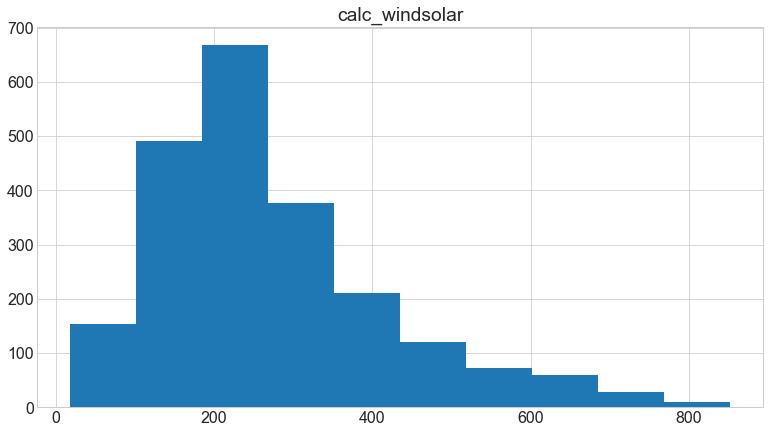

In [2]:
gdf = acquire.germany_daily()
gdf = prepare.prep_germany_data(gdf)
# changed date randge for dataset to 2012-2018 because there is no solar data prior to 2012
summarize.create_hist(gdf)

In [3]:
gdf.head()

,Consumption,Wind,Solar,orig_windsolar,calc_windsolar
Date,,,,,
2012-01-01,948.128,227.465,6.587,234.052,234.052
2012-01-02,1269.581,207.327,6.574,213.901,213.901
2012-01-03,1334.745,473.468,24.679,498.147,498.147
2012-01-04,1347.136,499.804,14.681,514.485,514.485
2012-01-05,1376.658,523.851,5.071,528.922,528.922


In [4]:
gdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2192 entries, 2012-01-01 to 2017-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Consumption     2192 non-null   float64
 1   Wind            2192 non-null   float64
 2   Solar           2192 non-null   float64
 3   orig_windsolar  2192 non-null   float64
 4   calc_windsolar  2192 non-null   float64
dtypes: float64(5)
memory usage: 102.8 KB


In [5]:
check_windsolar = gdf[gdf.orig_windsolar == gdf.calc_windsolar]
check_windsolar

,Consumption,Wind,Solar,orig_windsolar,calc_windsolar
Date,,,,,
2012-01-04,1347.13600,499.804,14.681,514.485,514.485
2012-01-06,1291.21500,286.265,13.160,299.425,299.425
2012-01-07,1175.68800,368.288,4.115,372.403,372.403
2012-01-12,1442.44800,446.327,18.023,464.350,464.350
2012-01-21,1242.30700,344.898,3.191,348.089,348.089
...,...,...,...,...,...
2017-12-20,1559.68569,90.880,8.799,99.679,99.679
2017-12-22,1423.23782,228.773,10.065,238.838,238.838
2017-12-27,1263.94091,394.507,16.530,411.037,411.037


**NOTE:** the original windsolar and calculated windsolar only match about 1/3 the time     
- 727 observations match
- 1465 observation DO NOT match


In [6]:
train, validate, test = explore.split_data(gdf)

In [7]:
explore.sanity_check_split(gdf, train, validate, test)

df lengths add to total: True
1st row of full df == 1st row train:             Consumption  Wind  Solar  orig_windsolar  calc_windsolar
Date                                                                
2012-01-01         True  True   True            True            True

 Is the last row of train the day before the first row of validate? And the same for validate to test?
            Consumption     Wind   Solar  orig_windsolar  calc_windsolar
Date                                                                    
2014-12-31     1183.510  145.511   3.721         149.232         149.232
2015-01-01     1111.336  325.128  17.079         342.207         342.207
            Consumption     Wind   Solar  orig_windsolar  calc_windsolar
Date                                                                    
2016-10-18     1489.622  164.324  42.428         206.752         206.752
2016-10-19     1503.565  204.847  38.170         243.017         243.017

 Is the last row of test the same as 

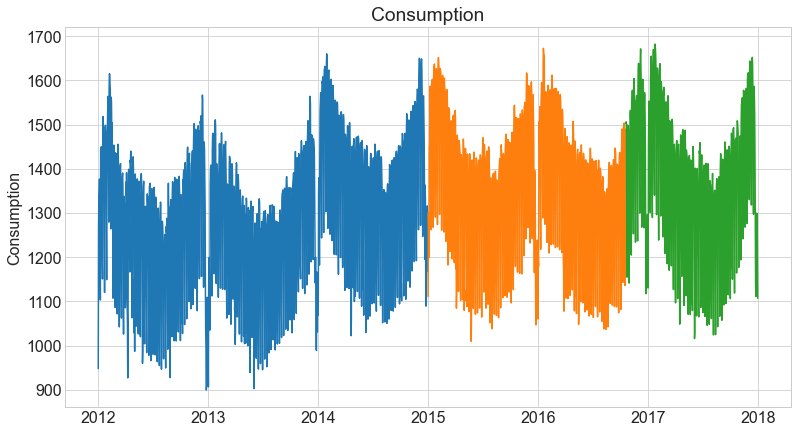

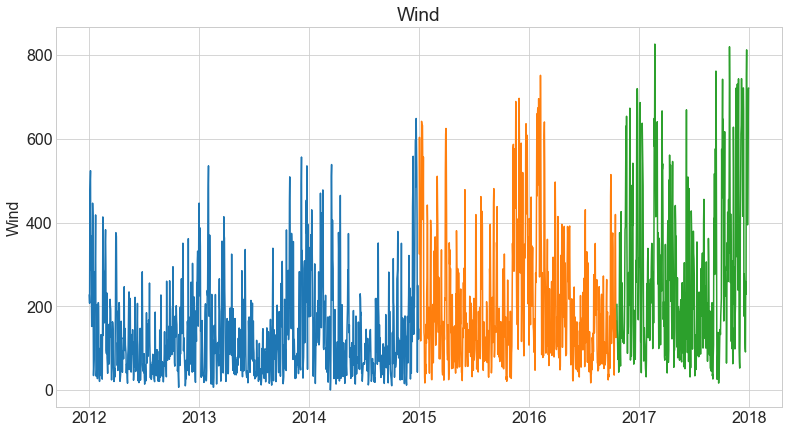

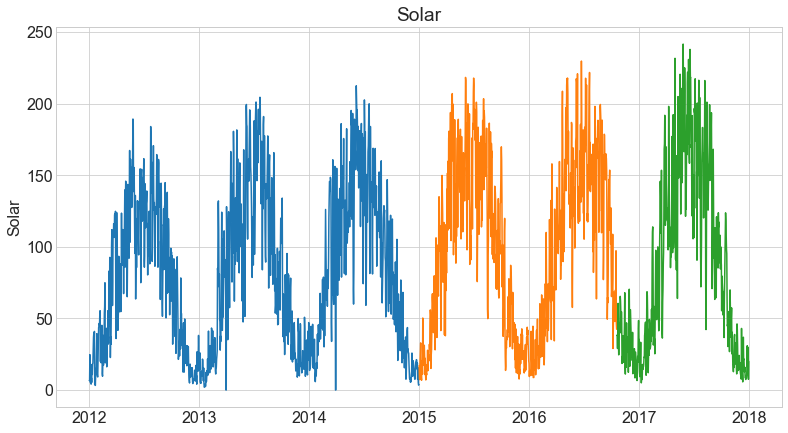

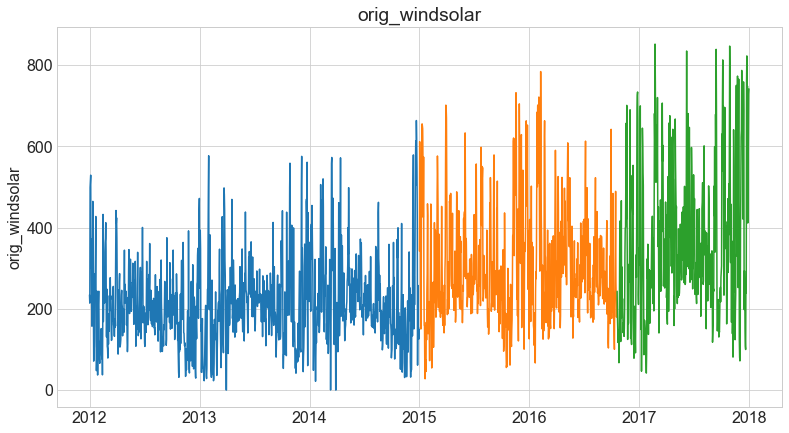

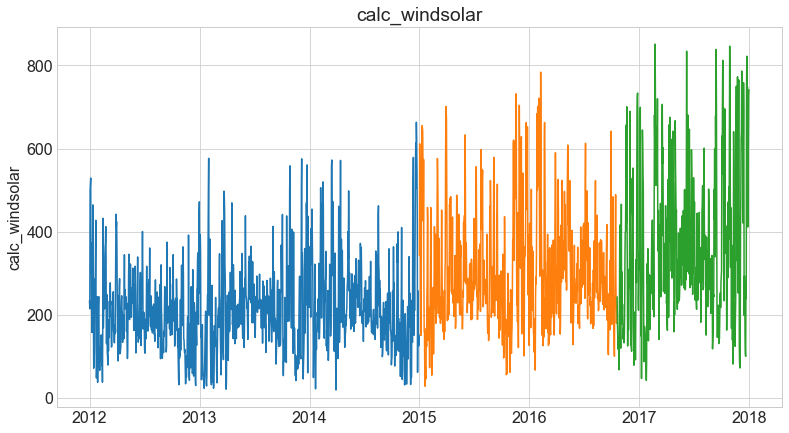

In [8]:
explore.chart_splits(train, validate, test)

### CORRECTED - changed date range for dataset

**NOTE:** the solar and original windsolar columns are all 0 in the train dataset      
- evidently they are recent addtions and so only have values in the validate and test datasets if percentage or human date split is used
- might need to try an alternative split method from sklearn if we want data from all columns in both sets
- see: https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py
- for now will limit exploration to just consumption instead

# EXPLORE

In [9]:
train.head()

,Consumption,Wind,Solar,orig_windsolar,calc_windsolar
Date,,,,,
2012-01-01,948.128,227.465,6.587,234.052,234.052
2012-01-02,1269.581,207.327,6.574,213.901,213.901
2012-01-03,1334.745,473.468,24.679,498.147,498.147
2012-01-04,1347.136,499.804,14.681,514.485,514.485
2012-01-05,1376.658,523.851,5.071,528.922,528.922


In [10]:
train_exp = explore.train_exp(train)
train_exp.head()

,Consumption,Wind,Solar,orig_windsolar,calc_windsolar,month,weekday
Date,,,,,,,
2012-01-01,948.128,227.465,6.587,234.052,234.052,1,Sunday
2012-01-02,1269.581,207.327,6.574,213.901,213.901,1,Monday
2012-01-03,1334.745,473.468,24.679,498.147,498.147,1,Tuesday
2012-01-04,1347.136,499.804,14.681,514.485,514.485,1,Wednesday
2012-01-05,1376.658,523.851,5.071,528.922,528.922,1,Thursday


In [11]:
train_exp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2012-01-01 to 2014-12-31
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Consumption     1096 non-null   float64
 1   Wind            1096 non-null   float64
 2   Solar           1096 non-null   float64
 3   orig_windsolar  1096 non-null   float64
 4   calc_windsolar  1096 non-null   float64
 5   month           1096 non-null   int64  
 6   weekday         1096 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 68.5+ KB


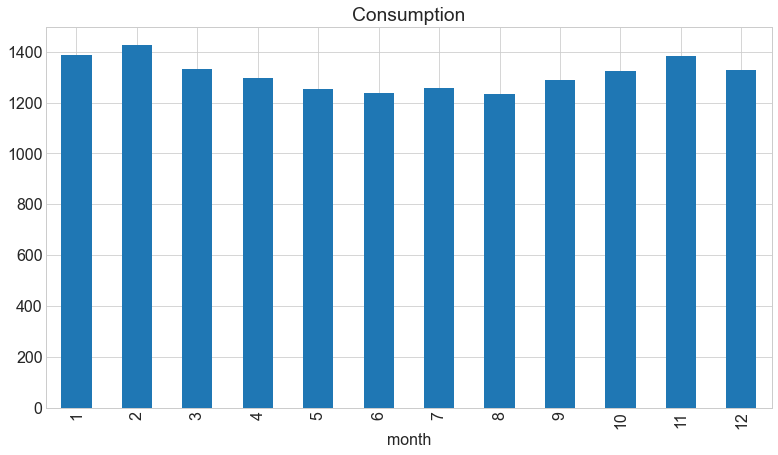

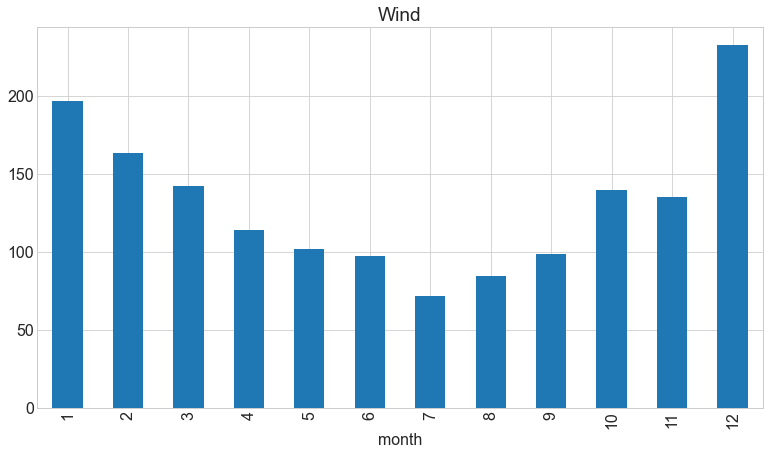

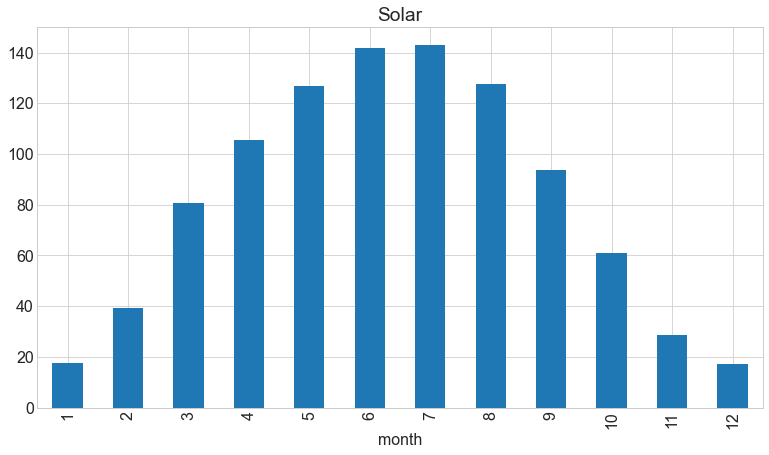

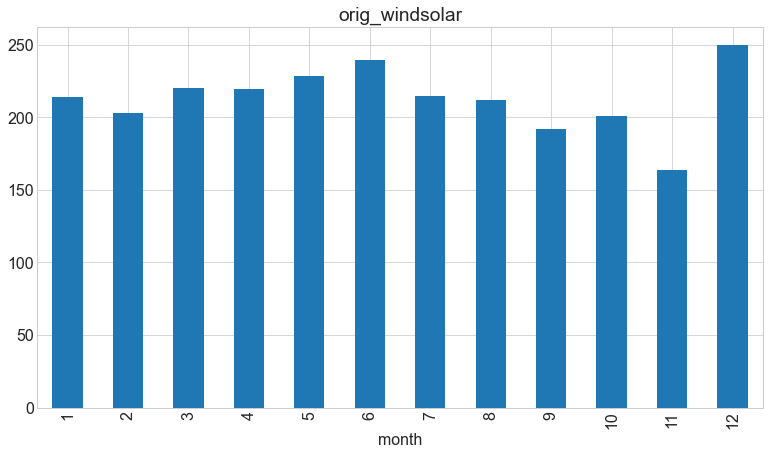

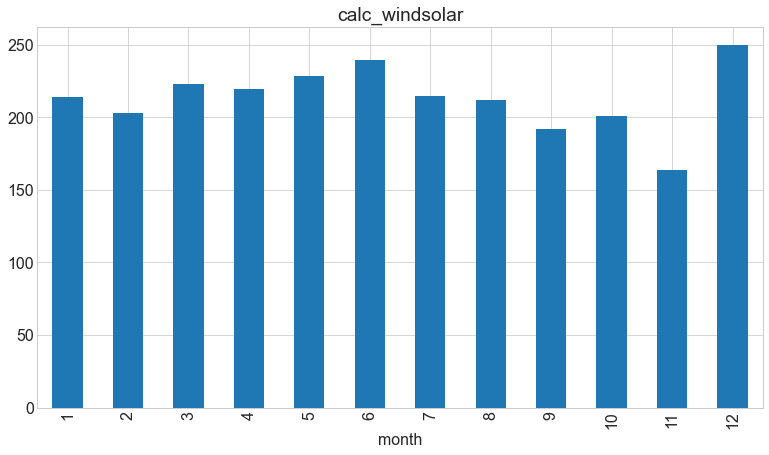

In [12]:
explore.bar_plots(train_exp)

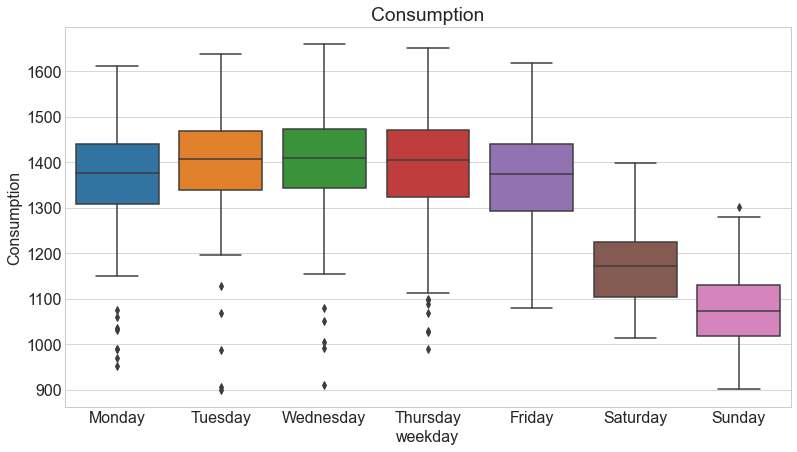

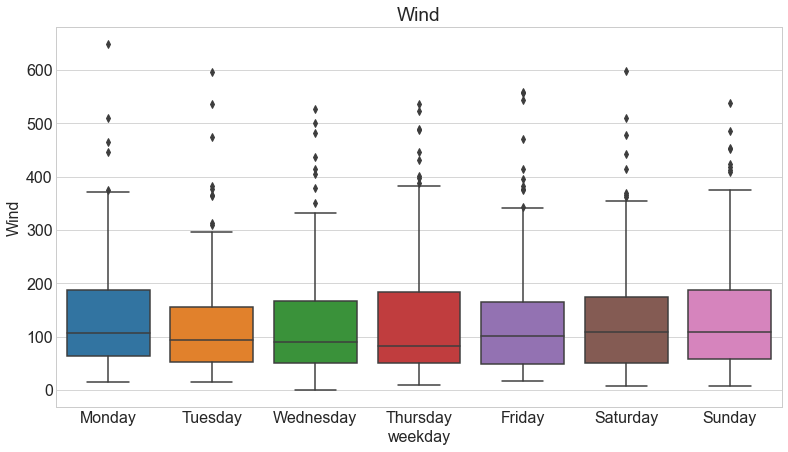

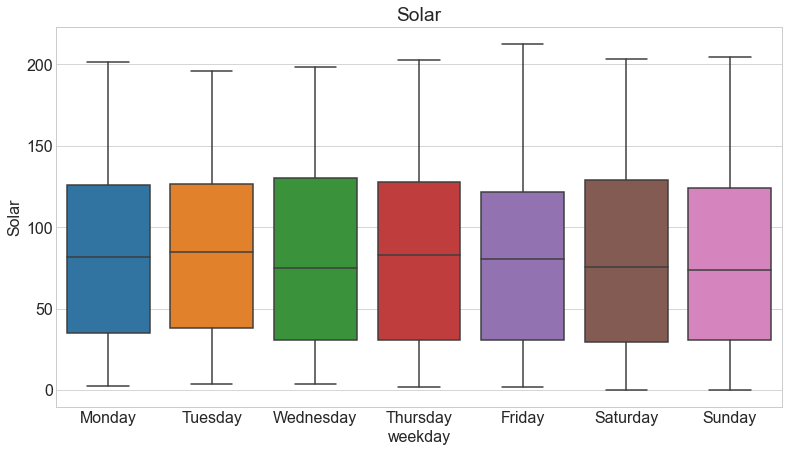

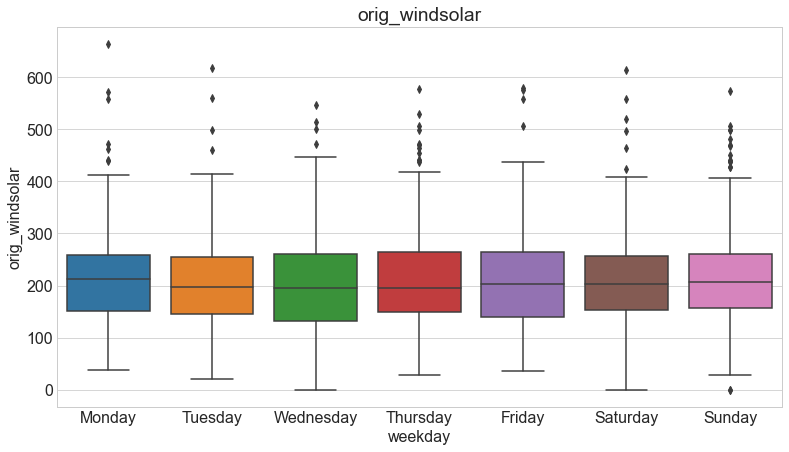

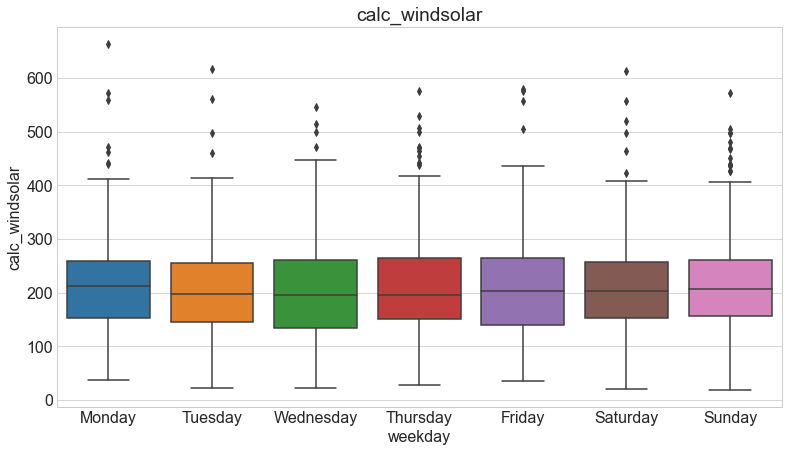

In [13]:
explore.sns_boxplot(train_exp)

In [14]:
# assign target variable/s
y = train.Consumption

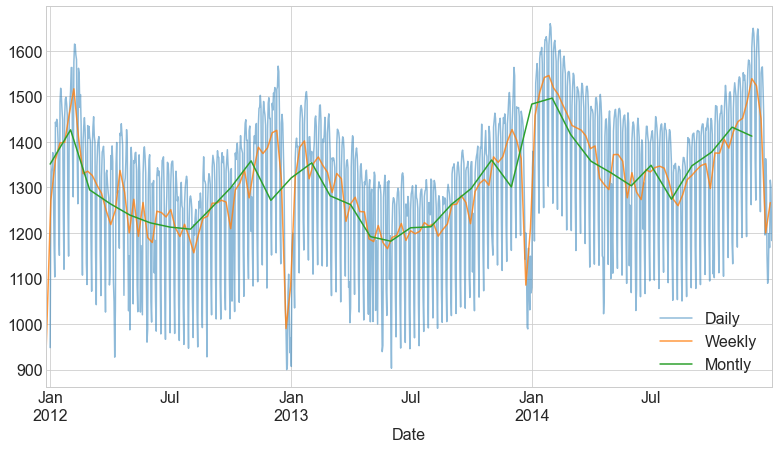

In [15]:
explore.resample_plot(y)

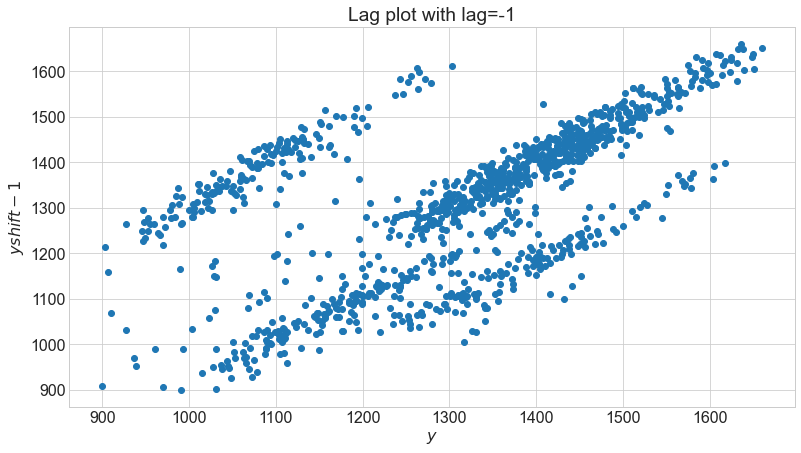

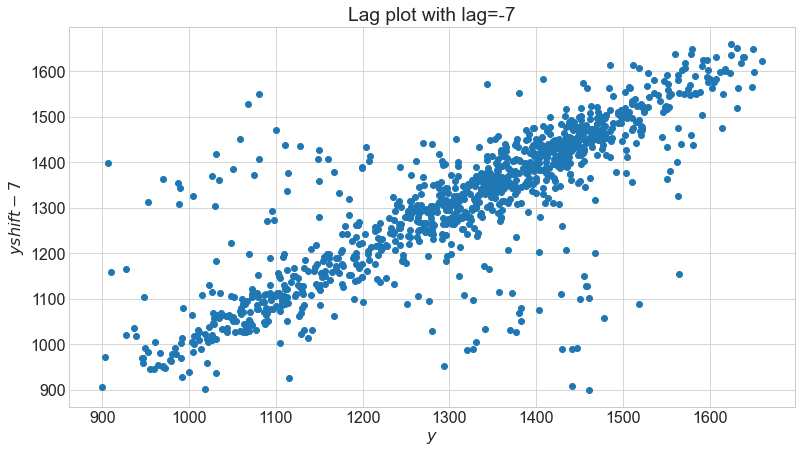

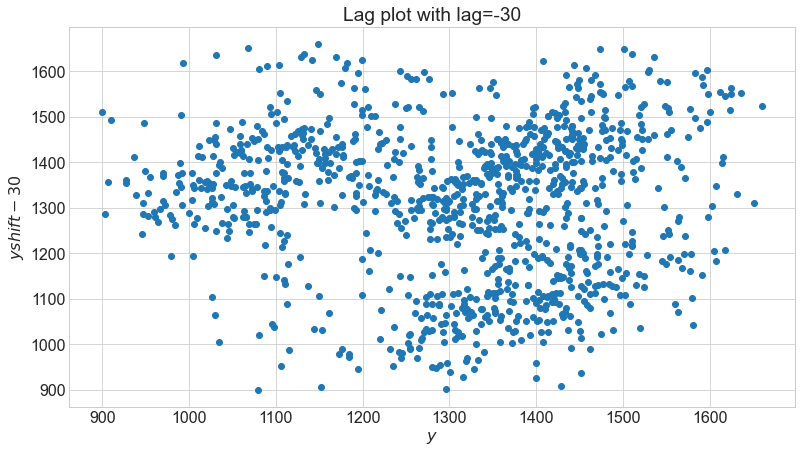

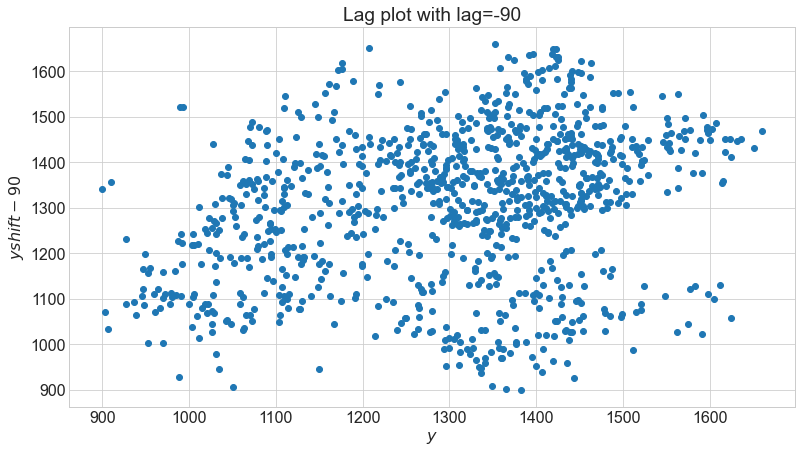

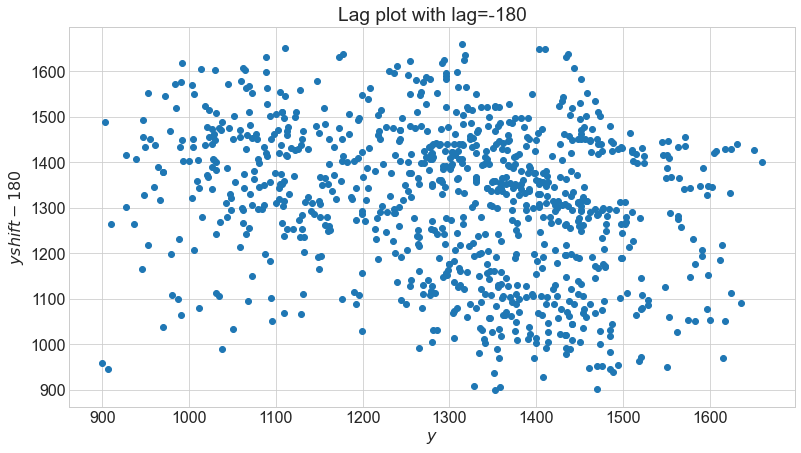

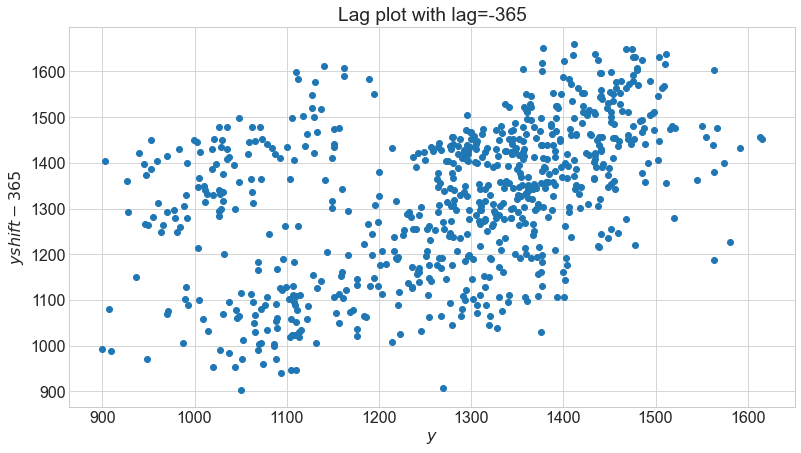

In [16]:
explore.lag_plots(y)

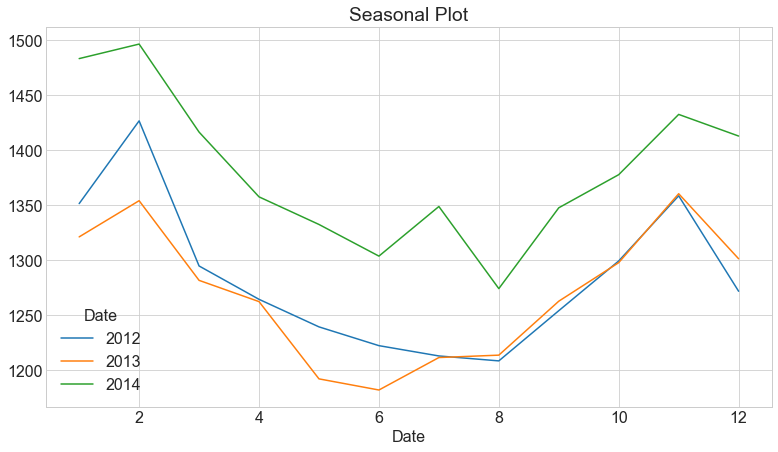

In [17]:
explore.seasonal_plot(y)

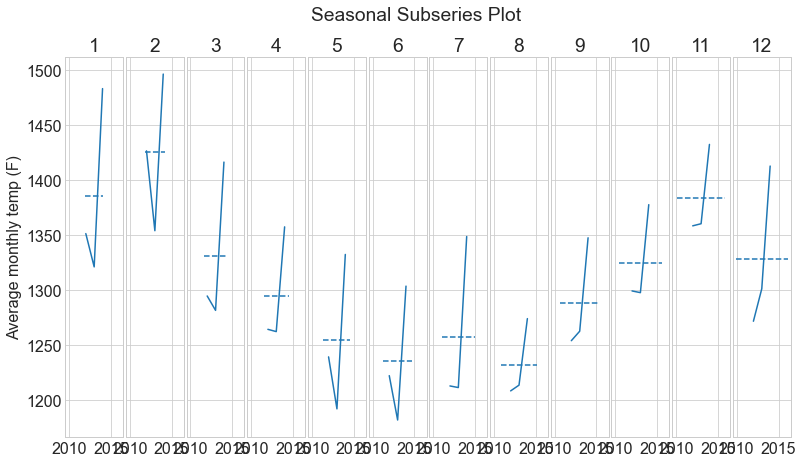

In [18]:
explore.season_subseries_plot(y)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

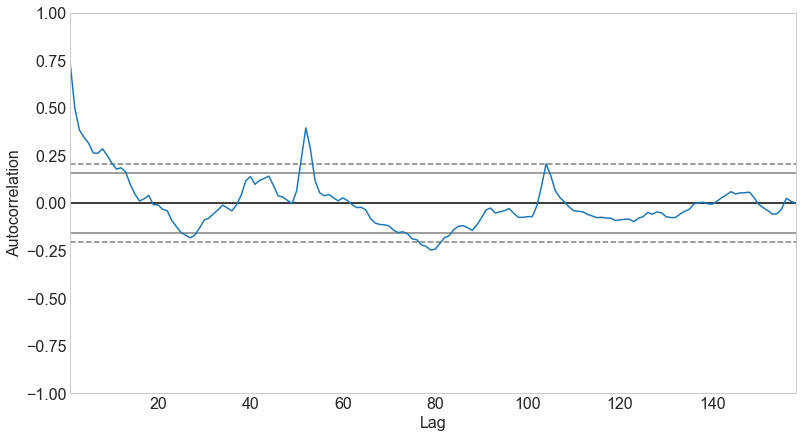

In [19]:
explore.autocorrelation_plot(y)

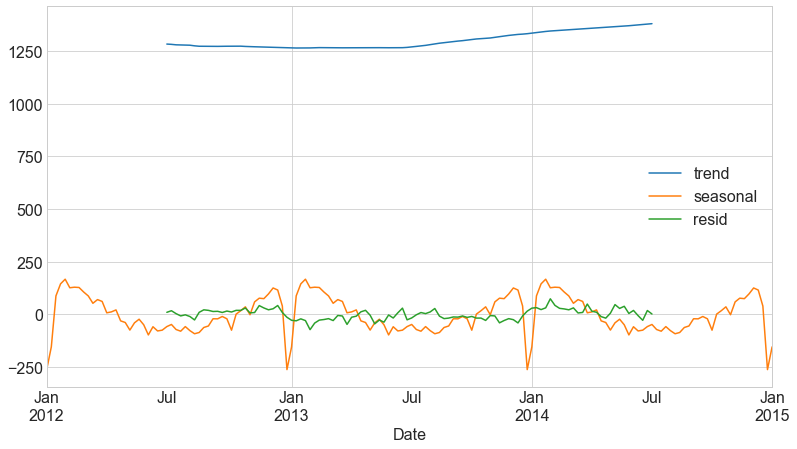

In [20]:
decomposition, result = explore.seasonal_decomposition(train)
explore.decomposition_plot(decomposition)

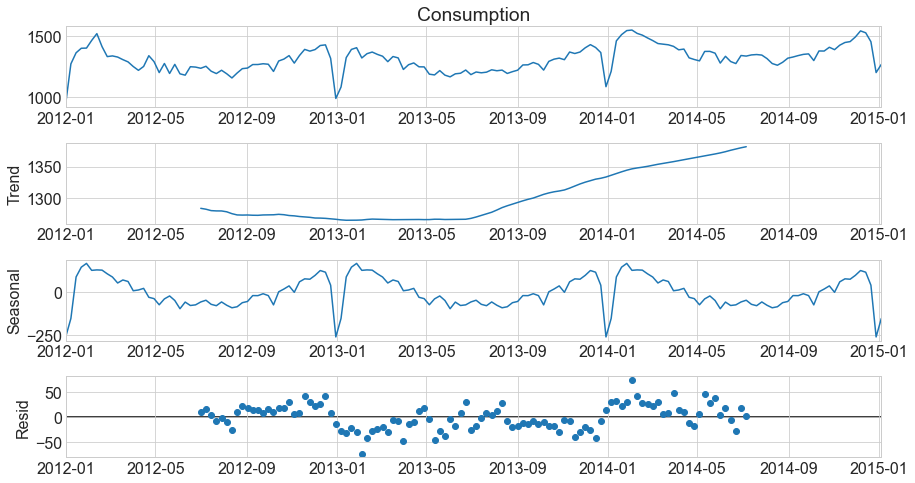

In [21]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

In [22]:
# NOT in explore.py

import pandas as pd
train_exp = train_exp.resample('W').mean()
# create a categorical feature
train_exp['use_bin'] = (pd.qcut(train_exp.Consumption, 3, labels=['low', 'mid', 'high']))
train_exp.groupby('use_bin')['Consumption'].mean()

use_bin
low     1201.529606
mid     1305.548488
high    1420.066547
Name: Consumption, dtype: float64

Text(0, 0.5, '% of days in the month')

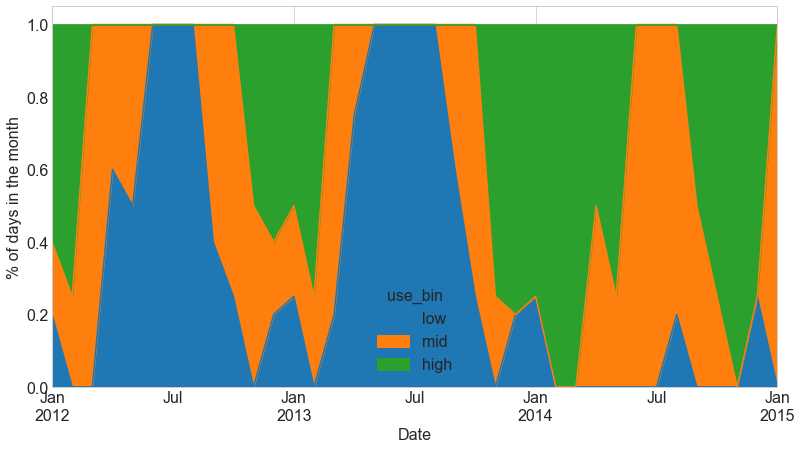

In [23]:
# NOT in explore.py

(train_exp.groupby('use_bin')
 .resample('M')
 .size() # like COUNT(*)
 .unstack(0) # turns an index level into columns
 .fillna(0)
 .astype(int)
.apply(lambda row: row / row.sum(), axis=1) # raw nums to % of the row
 .plot.area()
)
plt.ylabel('% of days in the month')

Text(0, 0.5, '% of days in the month')

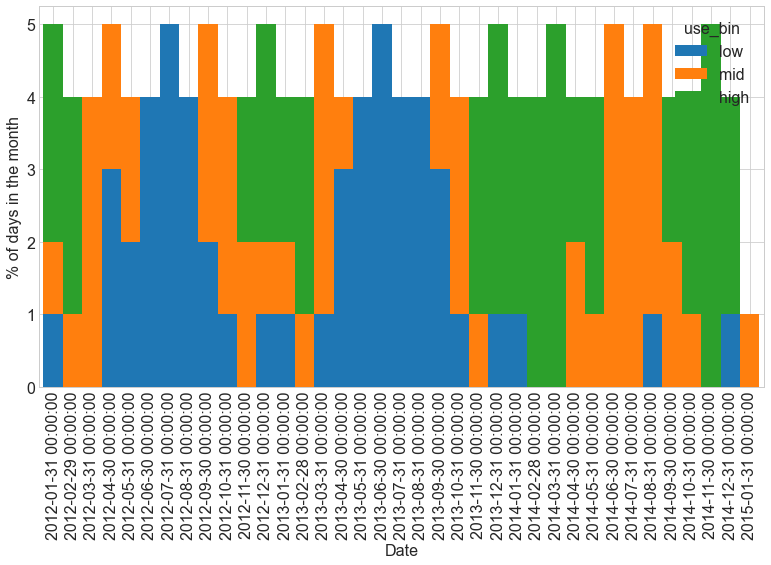

In [24]:
# NOT in explore.py

(train_exp.groupby('use_bin')
 .resample('M')
 .size()
 .unstack(0)
 .fillna(0)
 .astype(int)
 .plot.bar(stacked=True, width=1)
)
plt.ylabel('% of days in the month')

[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December'),
 Text(12, 0, 'January'),
 Text(13, 0, 'February'),
 Text(14, 0, 'March'),
 Text(15, 0, 'April'),
 Text(16, 0, 'May'),
 Text(17, 0, 'June'),
 Text(18, 0, 'July'),
 Text(19, 0, 'August'),
 Text(20, 0, 'September'),
 Text(21, 0, 'October'),
 Text(22, 0, 'November'),
 Text(23, 0, 'December'),
 Text(24, 0, 'January'),
 Text(25, 0, 'February'),
 Text(26, 0, 'March'),
 Text(27, 0, 'April'),
 Text(28, 0, 'May'),
 Text(29, 0, 'June'),
 Text(30, 0, 'July'),
 Text(31, 0, 'August'),
 Text(32, 0, 'September'),
 Text(33, 0, 'October'),
 Text(34, 0, 'November'),
 Text(35, 0, 'December'),
 Text(36, 0, 'January')]

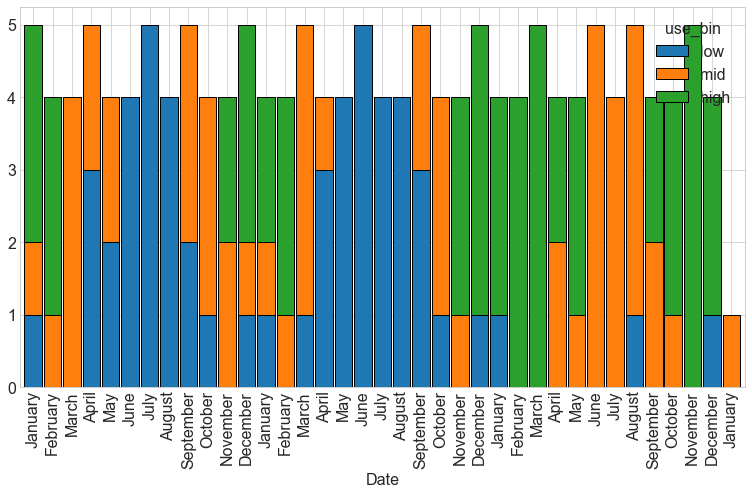

In [25]:
# NOT in explore.py

ax = (train_exp['2012':'2015']
 .groupby('use_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
# take the existing labels, convert them to Timestamps, and then reformat with .strftime
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)

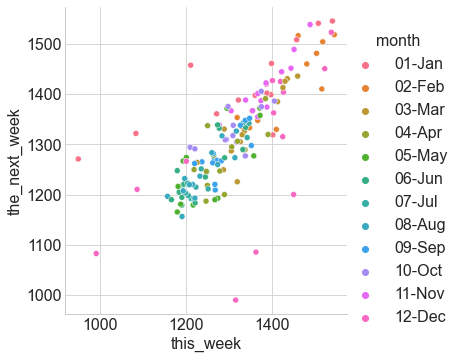

In [26]:
# NOT in explore.py

import seaborn as sns
weekly = train_exp.resample('W').mean()
weekly['the_next_week'] = weekly.Consumption.shift(-1)
weekly = weekly.rename(columns={'Consumption': 'this_week'})
weekly['month'] = weekly.index.strftime('%m-%b')
sns.relplot(data=weekly, y='the_next_week', x='this_week', hue='month')
# weekly.plot.scatter(x='this_week', y='the_next_week')

# MODEL

In [27]:
train.head()

,Consumption,Wind,Solar,orig_windsolar,calc_windsolar
Date,,,,,
2012-01-01,948.128,227.465,6.587,234.052,234.052
2012-01-02,1269.581,207.327,6.574,213.901,213.901
2012-01-03,1334.745,473.468,24.679,498.147,498.147
2012-01-04,1347.136,499.804,14.681,514.485,514.485
2012-01-05,1376.658,523.851,5.071,528.922,528.922


In [28]:
validate.head()

,Consumption,Wind,Solar,orig_windsolar,calc_windsolar
Date,,,,,
2015-01-01,1111.336,325.128,17.079,342.207,342.207
2015-01-02,1300.884,603.558,7.758,611.316,611.316
2015-01-03,1265.271,462.953,7.236,470.189,470.189
2015-01-04,1198.854,385.024,19.984,405.008,405.008
2015-01-05,1449.861,216.543,26.524,243.067,243.067


In [29]:
test.head()

,Consumption,Wind,Solar,orig_windsolar,calc_windsolar
Date,,,,,
2016-10-19,1503.565,204.847,38.170,243.017,243.017
2016-10-20,1506.204,144.763,38.410,183.173,183.173
2016-10-21,1479.348,123.034,28.979,152.013,152.013
2016-10-22,1247.090,74.708,42.324,117.032,117.032
2016-10-23,1154.998,72.829,60.492,133.321,133.321


In [30]:
# remove columns not going to use in modeling
del train['orig_windsolar']
del validate['orig_windsolar']
del test['orig_windsolar']

## Last Observed model

In [31]:
# get predicted values
LO_pred = model.last_observed_predictions(train, validate)
LO_pred.head(2)

,Consumption,Wind,Solar,calc_windsolar
Date,,,,
2015-01-01,1183.51,145.511,3.721,149.232
2015-01-02,1183.51,145.511,3.721,149.232


Consumption -- RMSE: 250


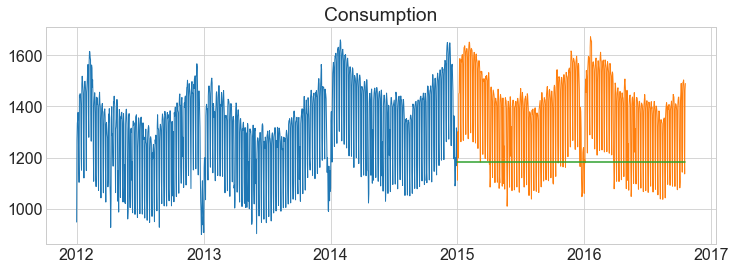

Wind -- RMSE: 163


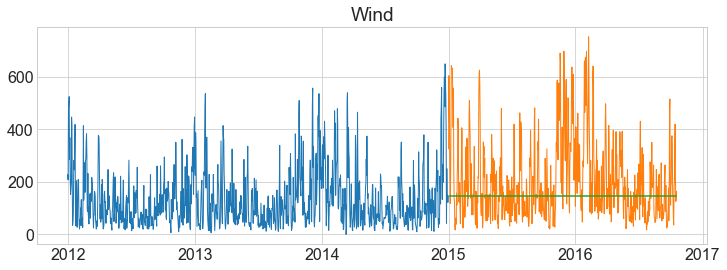

Solar -- RMSE: 115


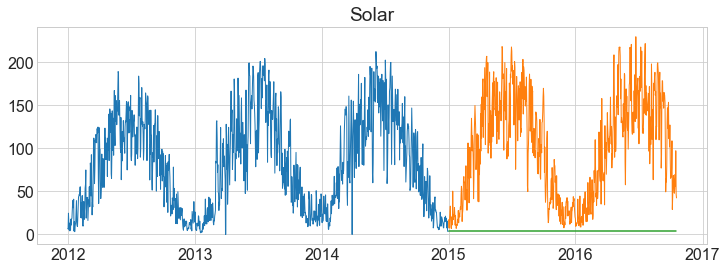

calc_windsolar -- RMSE: 211


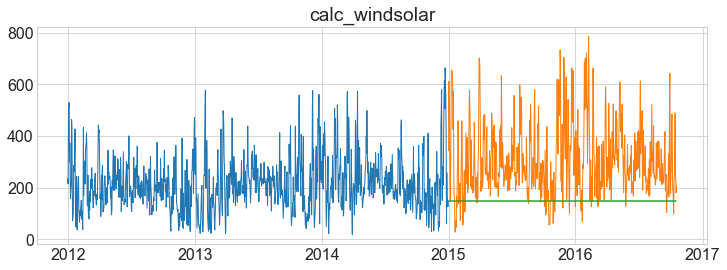

In [32]:
# plot predicted values
model.plot_pred_values(train, validate, LO_pred)

In [33]:
eval_df = model.create_eval_df()
eval_df

,model_type,target_var,rmse


In [34]:
# add predicitons to eval_df
for col in train.columns:
    eval_df = model.append_eval_df(eval_df, validate, LO_pred, model_type = 'last_observed_value', 
                             target_var = col)


In [35]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,Consumption,250.0
1,last_observed_value,Wind,163.0
2,last_observed_value,Solar,115.0
3,last_observed_value,calc_windsolar,211.0


## Simple Average Model

In [36]:
# get predicted values
SA_pred = model.simple_average_predictions(train, validate)
SA_pred.head(2)

,Consumption,Wind,Solar,calc_windsolar
Date,,,,
2015-01-01,1311.20112,131.540302,82.066988,213.60729
2015-01-02,1311.20112,131.540302,82.066988,213.60729


Consumption -- RMSE: 172


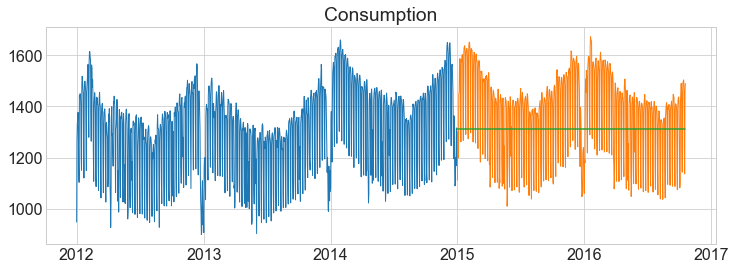

Wind -- RMSE: 168


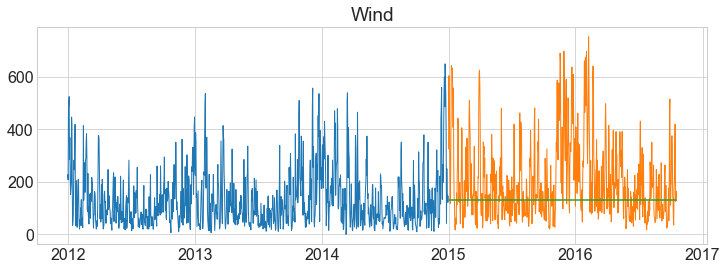

Solar -- RMSE: 63


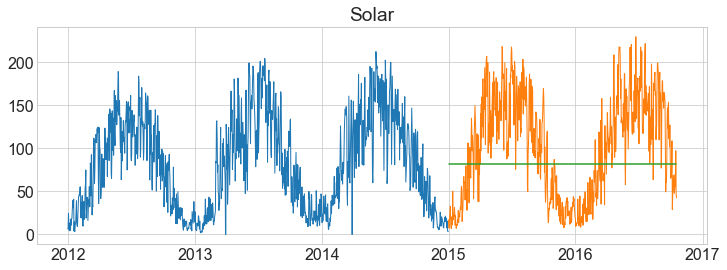

calc_windsolar -- RMSE: 167


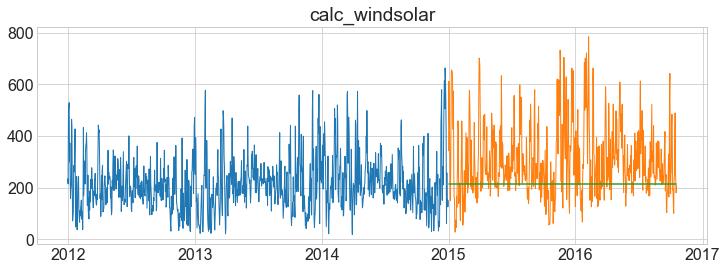

In [37]:
# plot predicted values
model.plot_pred_values(train, validate, SA_pred)

In [38]:
# add predicitons to eval_df
for col in train.columns:
    eval_df = model.append_eval_df(eval_df, validate, SA_pred, model_type = 'simple_average', 
                             target_var = col)

eval_df

,model_type,target_var,rmse
0,last_observed_value,Consumption,250.0
1,last_observed_value,Wind,163.0
2,last_observed_value,Solar,115.0
3,last_observed_value,calc_windsolar,211.0
4,simple_average,Consumption,172.0
5,simple_average,Wind,168.0
6,simple_average,Solar,63.0
7,simple_average,calc_windsolar,167.0


## 30 day rolling average

In [40]:
# get predicted values
ROLL_pred = model.rolling_avg_pred(train, validate, period=30)
ROLL_pred

,Consumption,Wind,Solar,calc_windsolar
Date,,,,
2015-01-01,1406.4,278.2,12.9,291.2
2015-01-02,1406.4,278.2,12.9,291.2
2015-01-03,1406.4,278.2,12.9,291.2
2015-01-04,1406.4,278.2,12.9,291.2
2015-01-05,1406.4,278.2,12.9,291.2
...,...,...,...,...
2016-10-14,1406.4,278.2,12.9,291.2
2016-10-15,1406.4,278.2,12.9,291.2
2016-10-16,1406.4,278.2,12.9,291.2


Consumption -- RMSE: 162


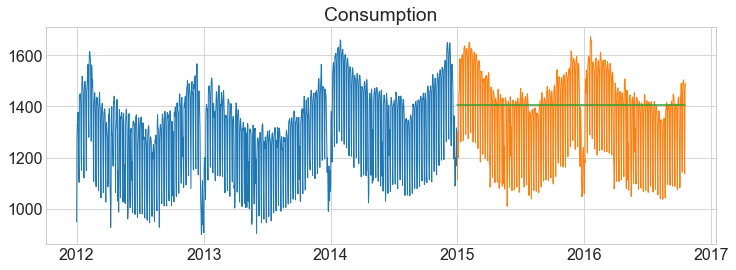

Wind -- RMSE: 167


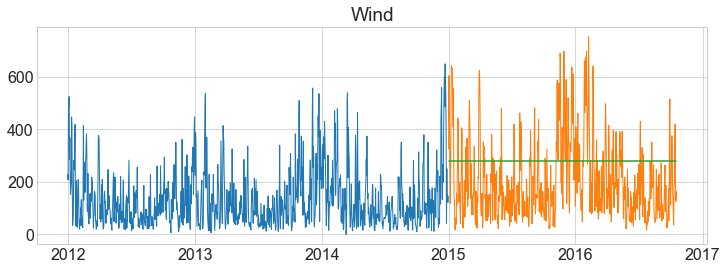

Solar -- RMSE: 107


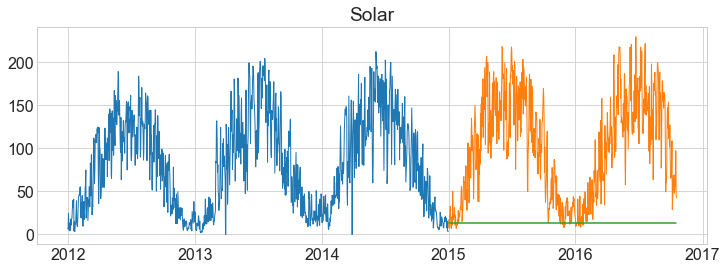

calc_windsolar -- RMSE: 139


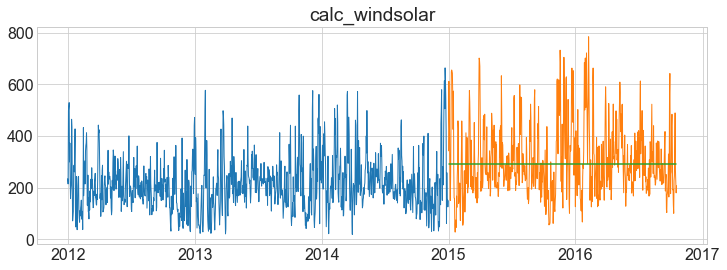

In [41]:
# plot predicted values
model.plot_pred_values(train, validate, ROLL_pred)

In [43]:
periods = [7, 30, 90, 180, 365]

for p in periods:
    ROLL_pred = model.rolling_avg_pred(train, validate, period=p)
    model_type = str(p) + 'd moving average'
    for col in train.columns:
        eval_df = model.append_eval_df(eval_df, validate, ROLL_pred, model_type = model_type, target_var = col)

eval_df

,model_type,target_var,rmse
0,last_observed_value,Consumption,250.0
1,last_observed_value,Wind,163.0
2,last_observed_value,Solar,115.0
3,last_observed_value,calc_windsolar,211.0
4,simple_average,Consumption,172.0
5,simple_average,Wind,168.0
6,simple_average,Solar,63.0
7,simple_average,calc_windsolar,167.0
8,7d moving average,Consumption,242.0
9,7d moving average,Wind,154.0
